In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [4]:
shape=X.shape
print(shape)

(1000, 2)


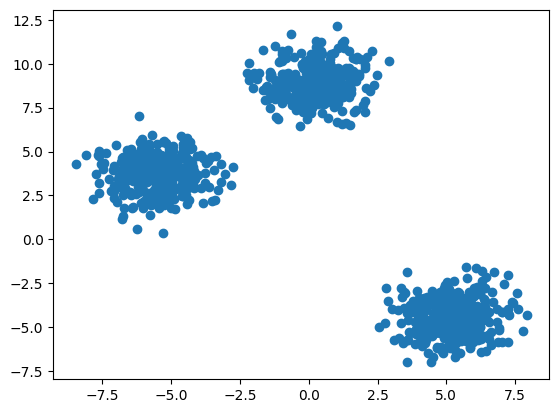

In [6]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

from sklearn.cluster import KMeans
# kmeans=KMeans(n_clusters=3)
# kmeans.fit(X_train)

KMeans(n_clusters=3)

In [11]:
# Manual Process

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

wcss

[34827.57682552022,
 7935.437286145416,
 1319.2730531585607,
 1186.5781423632811,
 992.0845125106916,
 976.1461310161147,
 827.1600430996971,
 668.4071146739103,
 585.9323815102805,
 533.2732475086477]

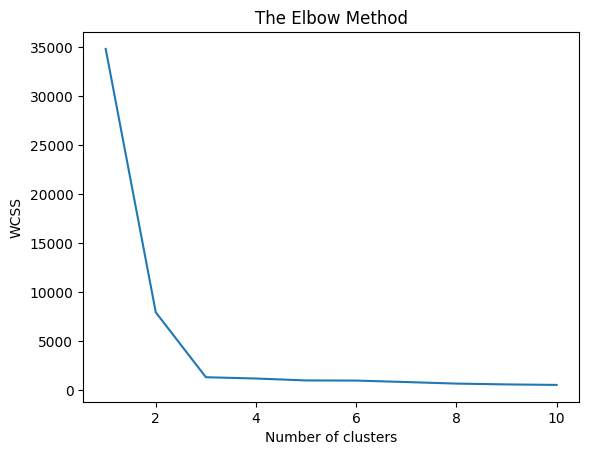

In [12]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans=KMeans(n_clusters=3,init='k-means++')
y_lables=kmeans.fit_predict(X_train)

In [17]:
y_test_lables=kmeans.predict(X_test)

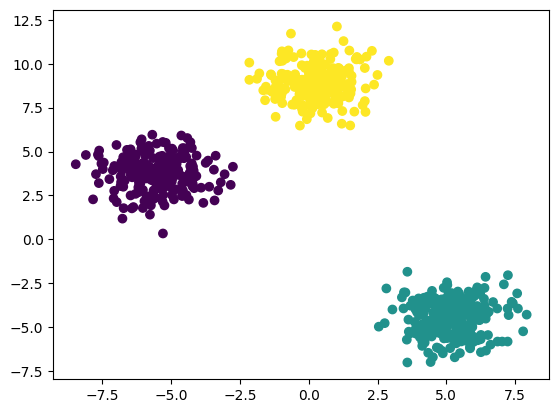

In [14]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_lables)

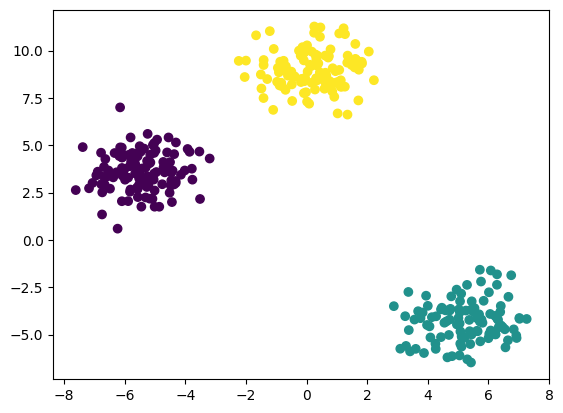

In [18]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_lables)

In [19]:
# Knee locator
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

np.int64(3)

In [23]:
# Performance Metrics
# Silhoutte Score
from sklearn.metrics import silhouette_score
silhouette_cofficient=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_cofficient.append(score)

In [24]:
silhouette_cofficient

[np.float64(0.7281443868598331),
 np.float64(0.8071181203797672),
 np.float64(0.6357733426488265),
 np.float64(0.4387849685659588),
 np.float64(0.46680748126685623),
 np.float64(0.47437768009412157),
 np.float64(0.34735726215016416),
 np.float64(0.33878321950007134),
 np.float64(0.34007650142568846)]

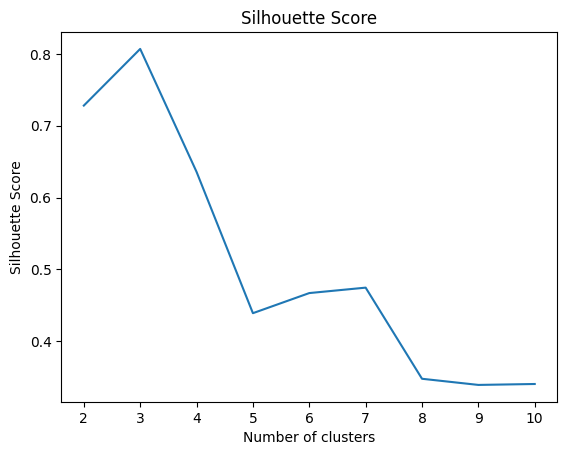

In [25]:
plt.plot(range(2,11),silhouette_cofficient)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()